
#Importação das bibliotecas

In [ ]:
# Principais bibliotecas de data science que foram usadas.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Leitura e visualização do dataset

In [ ]:
# Importando a base inicial sobre fatores de doença cardíaca.

data = pd.read_csv('./sample_data/heart_2020_cleaned.csv')
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
# Tipos de dados das colunas

data.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

#Separação dos dados Qualitativos e Quantitativos

In [ ]:
# Criando duas listas, uma para colunas qualitativas e outra para quantitativas.

quali = []
quant = []

for i in data.dtypes.index:
  if data.dtypes[i] == 'object':
    quali.append(i)
  else:
    quant.append(i)

In [ ]:
print('Qualitativas ', quali)
print('Quantitativas ', quant)

Qualitativas  ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
Quantitativas  ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']


#Análise quantitativa dos dados

In [ ]:
quant

['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

In [ ]:
# Criando um dataframe com as variáveis quantitativas para fazer estatística descritiva.

data_quant = data[quant]
data_quant.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0
2,26.58,20.0,30.0,8.0
3,24.21,0.0,0.0,6.0
4,23.71,28.0,0.0,8.0


In [ ]:
# Estatística Descritiva

data_quant.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,279481.000000,279481.000000,279480.000000,279480.000000
mean,28.322339,3.351516,3.909382,7.102043
std,6.366722,7.923934,7.955634,1.437878
min,12.020000,0.000000,0.000000,1.000000
25%,24.020000,0.000000,0.000000,6.000000
50%,27.320000,0.000000,0.000000,7.000000
75%,31.420000,2.000000,3.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


In [ ]:
data_quant.median()

BMI               27.32
PhysicalHealth     0.00
MentalHealth       0.00
SleepTime          7.00
dtype: float64

#Análise qualitativa dos dados

In [ ]:
# Criando um dataframe com as variáveis qualitativas para fazer a tabela de frequência.

df_quali = data[quali]

In [ ]:
# Fazendo a tabela de frequência para todas as colunas

for i in df_quali.columns:
        print('----------------------')
        print('Variável: ',i)
        print(df_quali.groupby(i).Sex.count())
        print('----------------------')

----------------------
Variável:  HeartDisease
HeartDisease
No     255564
Yes     23916
Name: Sex, dtype: int64
----------------------
----------------------
Variável:  Smoking
Smoking
No     163926
Yes    115554
Name: Sex, dtype: int64
----------------------
----------------------
Variável:  AlcoholDrinking
AlcoholDrinking
No     260359
Yes     19121
Name: Sex, dtype: int64
----------------------
----------------------
Variável:  Stroke
Stroke
No     268826
Yes     10654
Name: Sex, dtype: int64
----------------------
----------------------
Variável:  DiffWalking
DiffWalking
No     240705
Yes     38775
Name: Sex, dtype: int64
----------------------
----------------------
Variável:  Sex
Sex
Female    146439
Male      133041
Name: Sex, dtype: int64
----------------------
----------------------
Variável:  AgeCategory
AgeCategory
18-24          18581
25-29          14896
30-34          16459
35-39          18115
40-44          18308
45-49          19003
50-54          22121
55-59          

#Análise gráfica

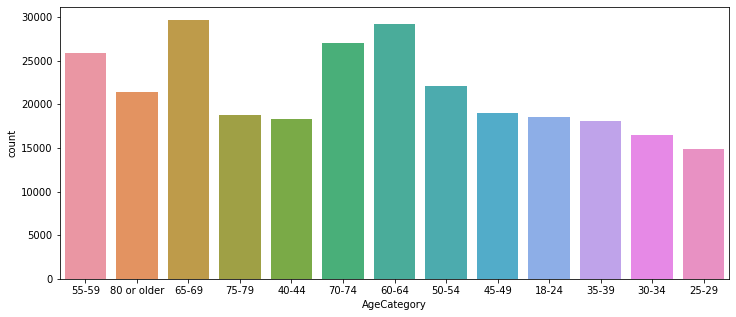

In [ ]:
# Quantidade de pessoas por faixa etária.

fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(x='AgeCategory', data=data, ax=ax);


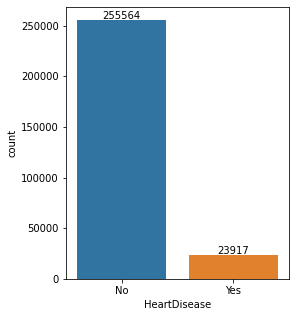

In [ ]:
# Quantidade de pessoas que tem uma doença cardíaca.

fig, ax = plt.subplots(figsize=(4, 5))
qtdhd = sns.countplot(x='HeartDisease', data=data, ax=ax);
for i in qtdhd.patches:
  qtdhd.annotate(i.get_height(),
               (i.get_x() + i.get_width() / 2, i.get_height()),
               ha = 'center', va = 'baseline', color='black', xytext=(0,1),
               textcoords='offset pixels')

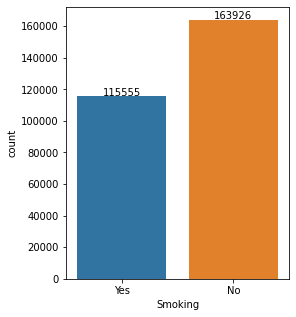

In [ ]:
# Quantidade de pessoas que fumam

fig, ax = plt.subplots(figsize=(4,5))
qtdsm = sns.countplot(x='Smoking', data=data, ax=ax)
for i in qtdsm.patches:
  qtdsm.annotate(i.get_height(),
               (i.get_x() + i.get_width() / 2, i.get_height()),
               ha = 'center', va = 'baseline', color='black', xytext=(0,1),
               textcoords='offset pixels')

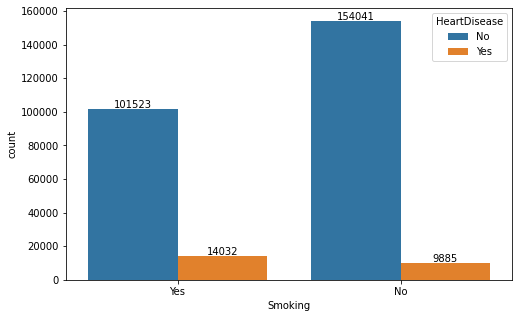

In [ ]:
# Relação entre fumar e ter uma doença cardíaca, nota-se um aumento considerável de doenças cardíacas em fumantes.

fig, ax = plt.subplots(figsize=(8,5))
relsmkhd = sns.countplot(x='Smoking', hue="HeartDisease", data=data, ax=ax)
for i in relsmkhd.patches:
  relsmkhd.annotate(i.get_height(),
               (i.get_x() + i.get_width() / 2, i.get_height()),
               ha = 'center', va = 'baseline', color='black', xytext=(0,1),
               textcoords='offset pixels')

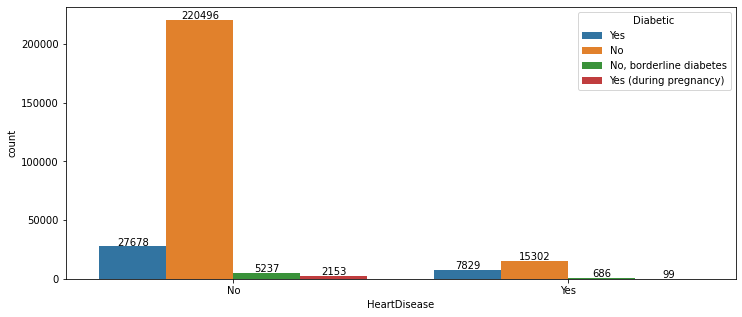

In [ ]:
# Relação entre diabetes e doenças cardíacas:
# Nota-se que 36% das pessoas que tem/pode ter diabete tem problemas cardíacos.
# Já nas pessoas que não tem diabetes, apenas 14% tem problemas cardíacos. 

fig, ax = plt.subplots(figsize=(12,5))
reldbhd = sns.countplot(x='HeartDisease', hue="Diabetic", data=data, ax=ax)
for i in reldbhd.patches:
  reldbhd.annotate(i.get_height(),
               (i.get_x() + i.get_width() / 2, i.get_height()),
               ha = 'center', va = 'baseline', color='black', xytext=(0,1),
               textcoords='offset pixels')

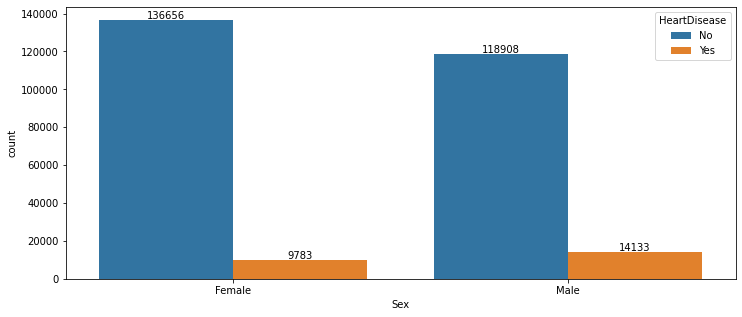

In [ ]:
# Gráfico comparando a frequência de problemas cardíacos por sexo.
# Nota-se um aumento de problemas cardíacos em homens, 10% contra 7% aprox.

fig, ax = plt.subplots(figsize=(12,5))
relsexhd = sns.countplot(x='Sex', hue="HeartDisease", data=data, ax=ax)
for i in relsexhd.patches:
  relsexhd.annotate(i.get_height(),
               (i.get_x() + i.get_width() / 2, i.get_height()),
               ha = 'center', va = 'baseline', color='black', xytext=(0,1),
               textcoords='offset pixels')

#Modelo de machine learning

In [ ]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Sex_binário,Smoking_binário,Diabetic_binário
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,...,Yes,Yes,Very good,5.0,Yes,No,Yes,1,1,1
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,...,No,Yes,Very good,7.0,No,No,No,1,0,0
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,...,Yes,Yes,Fair,8.0,Yes,No,No,0,1,1
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,...,No,No,Good,6.0,No,No,Yes,1,0,0
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,...,No,Yes,Very good,8.0,No,No,No,1,0,0


In [ ]:
# Utilizei o modelo de RandomForest para classificação

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# Fazendo a contagem dos dados

data['Sex'].value_counts()

Female    146439
Male      133041
Name: Sex, dtype: int64

In [ ]:
# Função para transformar 'Female' e 'Male' em números binários (1, 0)

def transformar_sexo(val):
  if val == 'Female':
    return 1
  else:
    return 0

data['Sex_binário'] = data['Sex'].map(transformar_sexo)

In [ ]:
# Função para transformar Smoking em números binários (1, 0)

def transformar_smoking(val):
  if val == 'Yes':
    return 1
  else:
    return 0

data['Smoking_binário'] = data['Smoking'].map(transformar_smoking)

In [ ]:
# Função para transformar Diabetic em números binários (0, 1)

def transformar_diabetic(val):
  if val == 'No':
    return 0
  else:
    return 1

data['Diabetic_binário'] = data['Diabetic'].map(transformar_diabetic)

In [ ]:
variaveis = ['Sex_binário', 'Smoking_binário', 'Diabetic_binário']

In [ ]:
X = data[variaveis]
y = data['HeartDisease']

In [ ]:
X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size=0.5)

In [ ]:
X_treino.shape, X_valid.shape, y_treino.shape, y_valid.shape

((139740, 3), (139741, 3), (139740,), (139741,))

In [ ]:
arvore = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)

In [ ]:
arvore.fit(X_treino,y_treino)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [ ]:
p = arvore.predict(X_valid)
p

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
res = np.mean(y_valid == p) * 100
res = res.round()
print(f'A acurácia foi de {res}%')

A acurácia foi de 91.0%
